In [3]:
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']

#set jp options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('../data/tribes.csv',  encoding="ISO-8859-1")
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])
tribes = df

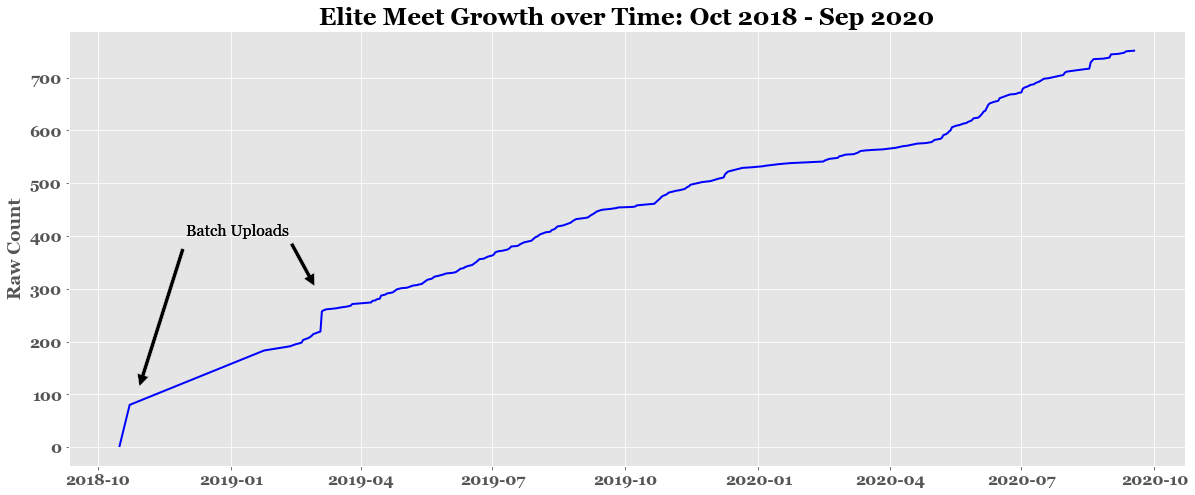

In [5]:
fig = plt.figure(figsize=(20,8))
plt.style.use('ggplot')
growth = tribes['CreatedDate'].dt.date.value_counts().sort_index().cumsum().plot(color='blue', lw=2)
title = plt.title('Elite Meet Growth over Time: Oct 2018 - Sep 2020', fontweight = 'bold', fontsize=24)
xs = plt.xticks(fontsize=16, fontweight='bold')
ys = plt.yticks(fontsize=16, fontweight='bold')
ylabel = plt.ylabel('Raw Count', fontsize=18, fontweight='bold')
ann1 = plt.annotate('Batch Uploads', xy=('2019-03-01', 300), xytext=('2018-12-01', 400), fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.05))
ann2 = plt.annotate('Batch Uploads', xy=('2018-10-28', 100), xytext=('2018-12-01', 400), fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.05))

In [6]:
tribes['year_month'] = tribes['CreatedDate'].dt.to_period('M')
fig = plt.figure(figsize=(20,6))

<Figure size 1440x432 with 0 Axes>

In [10]:
tribes = tribes[tribes['Branch'] != 'Coast Guard']

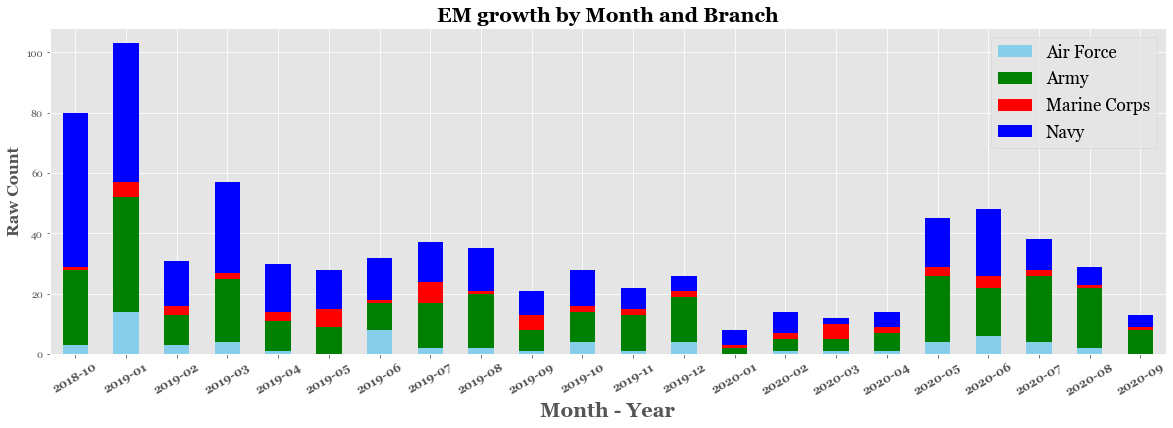

In [38]:
fig, ax = plt.subplots(figsize=(20,6))
grouped = tribes.groupby(['year_month', 'Branch']).size().unstack().fillna(0).plot(kind='bar', stacked=True,\
                color={'Air Force':'skyblue', 'Army':'green', 'Marine Corps':'red', 'Navy':'blue'}, ax=ax)
title = plt.title("EM growth by Month and Branch", fontweight='bold', fontsize=20)
ticks = plt.xticks(rotation=30, fontweight='bold', fontsize=12)
xlabel = plt.xlabel('Month - Year', fontweight='bold', fontsize=20)
ylabel = plt.ylabel('Raw Count', fontweight='bold', fontsize=16)
legend = plt.legend(fontsize='xx-large')

In [41]:
grouped = tribes.groupby(['year_month', 'Branch']).size().unstack().fillna(0)

In [42]:
grouped['row_sum'] = grouped.sum(axis=1)

In [54]:
pd.options.display.float_format = '{:,.2f}'.format
props = (grouped.loc[:,'Air Force':'Navy'].div(grouped['row_sum'], axis=0) * 100)

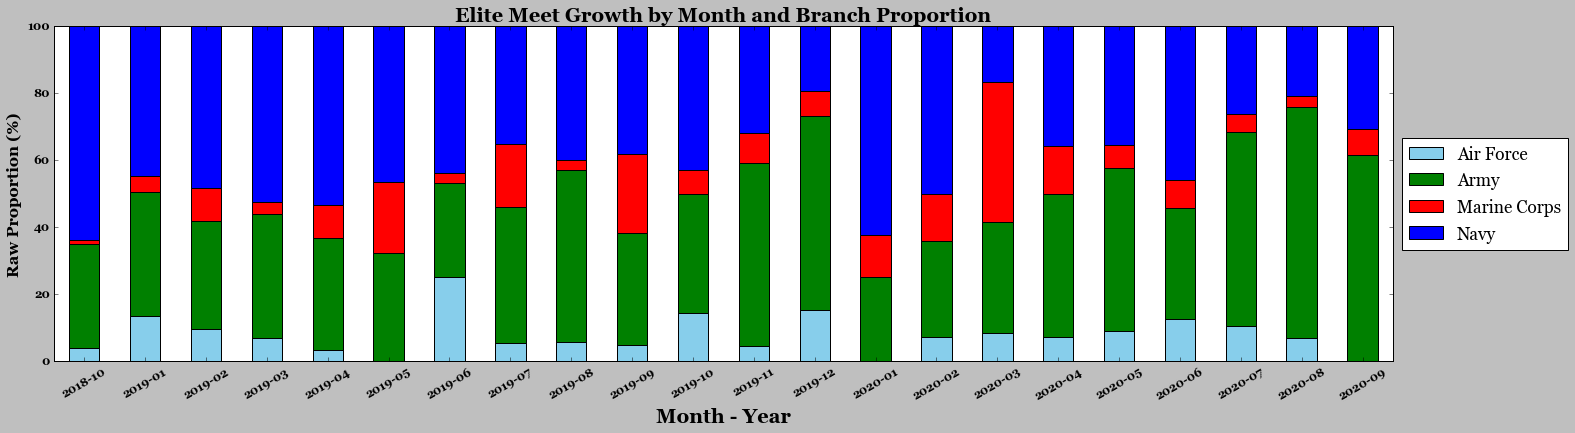

In [81]:
plt.style.use('grayscale')
fig, ax = plt.subplots(figsize=(24,6))
plot_ = props.plot(kind='bar', stacked=True,color={'Army':'green', 'Navy':'blue', 'Marine Corps':'red', 'Air Force':'skyblue',}, ax=ax)
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='xx-large')
title = plt.title('Elite Meet Growth by Month and Branch Proportion', fontweight='bold', fontsize=20)
xticks = plt.xticks(rotation=30, fontweight='bold', fontsize=12)
xlabel = plt.xlabel('Month - Year', fontweight='bold', fontsize=20)
ylabel = plt.ylabel('Raw Proportion (%)', fontweight='bold', fontsize=16)
yticks = plt.yticks(fontweight='bold', fontsize=12)
plt.grid(False)

In [49]:
true_proportions = np.array([3,1,2,0.3])/6.3

In [51]:
true_proportions * 100

array([47.61904762, 15.87301587, 31.74603175,  4.76190476])

In [127]:
words = tribes['How_did_you_hear_about_Elite_Meet'].dropna().values

In [137]:
list_words = words.tolist()

In [132]:
joined_words = ' '.join(words.tolist())

In [ ]:
tribes['Birthdate'] = pd.to_datetime(tribes['Birthdate'])

tribes['CreatedDate'] = pd.to_datetime(tribes['CreatedDate'])

officers = tribes[(tribes['Tribe'] == 'Pilot')|(tribes['Tribe'] == 'Helo Pilot')|(tribes['Military_specialty_in_real_words'].str.contains('officer'))|(tribes['Military_specialty_in_real_words'].str.contains('Officer'))|(tribes['Undergrad_School'].str.contains('Academy'))]

tribes['Military_specialty_in_real_words'].fillna('No entry', inplace=True)

officerIds = officers['Id']

pd.set_option('display.max_rows', 500)
tribes[~tribes['Id'].isin(officerIds)]

df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])

branches = ['Navy', 'Army', 'Air Force', 'Marine Corps']
colors = ['blue', 'green', 'skyblue', 'red']

fig = plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
for branch, color in zip(branches, colors):
    temp = df[df['Branch'] == branch]
    data = temp['CreatedDate'].dt.date.value_counts().sort_index().cumsum()
    last_day = data.index[-1]
    total_count = data[-1]
    plot = data.plot(label=branch, c=color)
    if branch != 'Air Force':
        text = plt.text(last_day + pd.DateOffset(days=5), total_count, str(total_count), fontsize=24) 
    else: text = plt.text(last_day, total_count + 5, str(total_count), fontsize=24) 
legend = plt.legend()
ticks = plt.xticks(fontsize=18)
title = plt.title('Growth of EM by Branch: Oct 2018 - Sep 2020', fontsize=28)

test = df[df['Branch'] == 'Navy']
test['CreatedDate'].dt.date.value_counts().sort_index().cumsum().index[-1]

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
for name in tribe_names:
    temp = df[df['Tribe'] == name]
    data = temp['CreatedDate'].dt.date.value_counts().sort_index().cumsum()
    last_day = data.index[-1]
    total_count = data[-1]
    plot = data.plot(label=name)
    #if branch != 'Air Force':
    text = plt.text(last_day + pd.DateOffset(days=5), total_count, str(total_count), fontsize=24) 
    #else: text = plt.text(last_day, total_count + 5, str(total_count), fontsize=24) 
legend = plt.legend()
ticks = plt.xticks(fontsize=18)
title = plt.title('Growth of EM by Tribe: Oct 2018 - Sep 2020', fontsize=28)

len(df[df['Tribe'] == 'SEAL'])

## Word Cloud

<Figure size 864x864 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

<Figure size 864x864 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

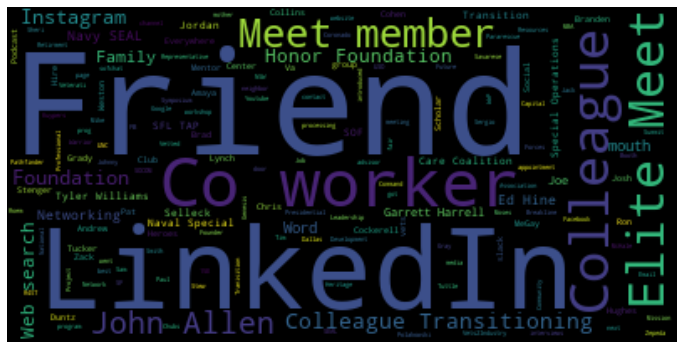

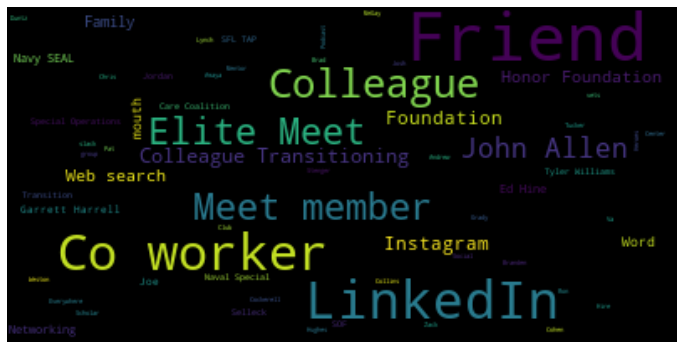

In [139]:
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud().generate(joined_words)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(joined_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [140]:
tribes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 751
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Id                                      751 non-null    object        
 1   Birthdate                               78 non-null     object        
 2   CreatedDate                             751 non-null    datetime64[ns]
 3   Location                                750 non-null    object        
 4   City                                    749 non-null    object        
 5   State                                   749 non-null    object        
 6   How_did_you_hear_about_Elite_Meet       540 non-null    object        
 7   Your_transition_to_civilian_life_begin  451 non-null    object        
 8   Undergrad                               638 non-null    object        
 9   Undergrad_School                        684 non-null  

In [161]:
raw = pd.read_csv('../../data/Raw_data_for_EM_decisionMakers.csv', encoding="ISO-8859-1")

In [155]:
seals_swcc = tribes['Id'][(tribes['Tribe'] == 'SEAL')|(tribes['Tribe'] == "SWCC")]

In [157]:
seal_swcc_data_pull = raw[raw['Id'].isin(seals_swcc)]

In [183]:
pd.set_option('display.max_columns', 60)
merged = pd.merge(seal_swcc_data_pull, raw_info, how='left', on='Id')

In [160]:
seal_swcc_data_pull.to_csv('../data/seal_swcc_data_pull.csv', index=False)

In [187]:
ss = tribes[tribes['Id'].isin(seals_swcc)]

In [189]:
merged = pd.merge(ss, raw_info, on='Id')

First Name\
Last Name\
Tribe\
EOS\
Phone\
Email

In [190]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Id                                      194 non-null    object        
 1   Birthdate                               31 non-null     object        
 2   CreatedDate                             194 non-null    datetime64[ns]
 3   Location                                194 non-null    object        
 4   City                                    194 non-null    object        
 5   State                                   194 non-null    object        
 6   How_did_you_hear_about_Elite_Meet       124 non-null    object        
 7   Your_transition_to_civilian_life_begin  101 non-null    object        
 8   Undergrad                               152 non-null    object        
 9   Undergrad_School                        169 non-null  

In [194]:
raw = merged.iloc[:,[32,33,20,7,34,35,36]].sort_values('LastName')

In [196]:
raw.to_csv('../../data/seal_swcc_data.csv', index=False)